In [ ]:
!pip install fbprophet

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [ ]:
df

timeStamp  demand  precip   temp
0     2012-01-01 00:00:00  4937.5  0.0000  46.13
1     2012-01-01 01:00:00  4752.1  0.0000  45.89
2     2012-01-01 02:00:00  4542.6  0.0000  45.04
3     2012-01-01 03:00:00  4357.7  0.0000  45.03
4     2012-01-01 04:00:00  4275.5  0.0000  42.61
...                   ...     ...     ...    ...
49200 2017-08-12 02:00:00     NaN  0.0000  70.84
49201 2017-08-12 03:00:00     NaN  0.0000  70.57
49202 2017-08-12 04:00:00     NaN  0.0000  69.89
49203 2017-08-12 05:00:00     NaN  0.0000  68.59
49204 2017-08-12 06:00:00     NaN  0.0031  67.33

[49205 rows x 4 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [ ]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [ ]:
df.head()

timeStamp  demand  precip   temp
0 2012-01-01 00:00:00  4937.5     0.0  46.13
1 2012-01-01 01:00:00  4752.1     0.0  45.89
2 2012-01-01 02:00:00  4542.6     0.0  45.04
3 2012-01-01 03:00:00  4357.7     0.0  45.03
4 2012-01-01 04:00:00  4275.5     0.0  42.61

In [ ]:
fig = px.line(df, x='timeStamp', y='demand', hover_data=['temp'], title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
ny_df=df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b38eb22e8>,
      dtype=object)

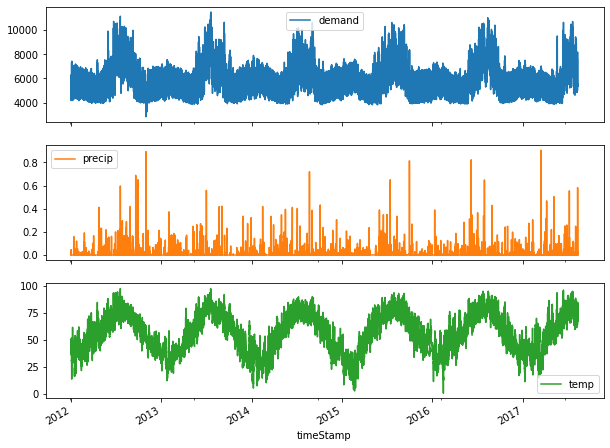

In [ ]:
ny_df.plot(subplots=True)

In [ ]:
ny_df.resample('D').mean()

demand    precip       temp
timeStamp                                   
2012-01-01  4954.833333  0.002487  46.510000
2012-01-02  5302.954167  0.000000  40.496667
2012-01-03  6095.512500  0.000000  26.672500
2012-01-04  6336.266667  0.000000  20.585000
2012-01-05  6130.245833  0.000000  33.577500
...                 ...       ...        ...
2017-08-08  6471.626042  0.000000  71.039167
2017-08-09  6811.112167  0.047529  73.852500
2017-08-10  5582.297000  0.002033  75.217500
2017-08-11          NaN  0.000000  72.767917
2017-08-12          NaN  0.000443  69.771429

[2051 rows x 3 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b387d28d0>,
      dtype=object)

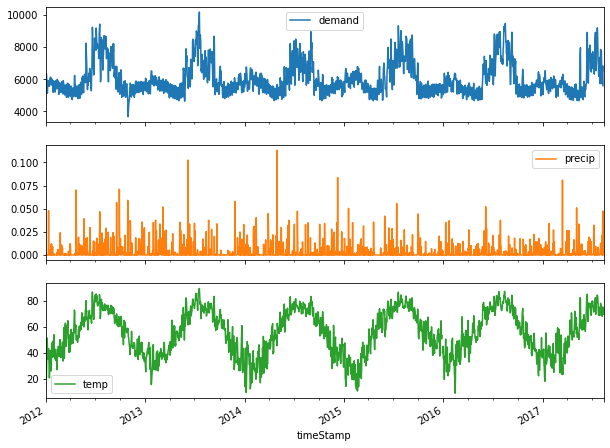

In [ ]:
ny_df.resample('D').mean().plot(subplots=True)

In [ ]:
ny_df_daily=ny_df.resample('D').mean()

In [ ]:
from fbprophet import Prophet

In [ ]:
ny_df_daily

demand    precip       temp
timeStamp                                   
2012-01-01  4954.833333  0.002487  46.510000
2012-01-02  5302.954167  0.000000  40.496667
2012-01-03  6095.512500  0.000000  26.672500
2012-01-04  6336.266667  0.000000  20.585000
2012-01-05  6130.245833  0.000000  33.577500
...                 ...       ...        ...
2017-08-08  6471.626042  0.000000  71.039167
2017-08-09  6811.112167  0.047529  73.852500
2017-08-10  5582.297000  0.002033  75.217500
2017-08-11          NaN  0.000000  72.767917
2017-08-12          NaN  0.000443  69.771429

[2051 rows x 3 columns]

In [ ]:
ny_df_final=ny_df_daily.reset_index()[['timeStamp','demand','temp']].rename({'timeStamp':'ds','demand':'y','temp':'temp'}, axis='columns')

In [ ]:
ny_df_final

ds            y       temp
0    2012-01-01  4954.833333  46.510000
1    2012-01-02  5302.954167  40.496667
2    2012-01-03  6095.512500  26.672500
3    2012-01-04  6336.266667  20.585000
4    2012-01-05  6130.245833  33.577500
...         ...          ...        ...
2046 2017-08-08  6471.626042  71.039167
2047 2017-08-09  6811.112167  73.852500
2048 2017-08-10  5582.297000  75.217500
2049 2017-08-11          NaN  72.767917
2050 2017-08-12          NaN  69.771429

[2051 rows x 3 columns]

#Missing values

Prophet handles the missing values for ds and y columns only

In [ ]:
ny_df_final.query('temp != temp')

ds            y  temp
1457 2015-12-28  5510.776333   NaN

In [ ]:
ny_df_final['temp']=ny_df_final['temp'].fillna(method='ffill')

Previous model fit with Univariate demand data. If the image is not visible click on the link.
This images shows the prediction of univariate model on the same data.

![alt text](http://drive.google.com/uc?export=view&id=1ucmj_y2-5SuNjIpR89Rg6vrM0j6979wB)

In [ ]:
#ny_df_final['ds'].dt.month

In [ ]:
ny_df_final['month']=ny_df_final['ds'].dt.month

In [ ]:
ny_df_final.head()

ds            y       temp  month
0 2012-01-01  4954.833333  46.510000      1
1 2012-01-02  5302.954167  40.496667      1
2 2012-01-03  6095.512500  26.672500      1
3 2012-01-04  6336.266667  20.585000      1
4 2012-01-05  6130.245833  33.577500      1

In [ ]:
fig = px.line(ny_df_final, x='ds', y='y', hover_data=['temp','month'], title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
ny_df_final[['month','temp']].groupby('month').agg({'temp':{'max','min','mean'}})

temp                      
            mean        max        min
month                                 
1      33.432140  55.420455   9.507917
2      34.517758  59.360000   9.015000
3      41.419884  67.878333  20.291667
4      52.600204  72.992083  33.045833
5      62.543994  82.576250  48.090833
6      71.334418  86.916667  52.405833
7      77.595627  89.606667  66.417083
8      75.525947  87.426250  68.042083
9      69.550306  84.448750  57.274583
10     58.642895  74.277500  42.106250
11     47.225638  67.606250  27.172500
12     41.520068  64.735000  22.429583

In [ ]:
ny_df_final[['y','temp']].corr()

y      temp
y     1.000000  0.560888
temp  0.560888  1.000000

In [ ]:
ny_df_final.query('temp > 80')

ds            y       temp  month
149  2012-05-29  8223.062500  80.242500      5
171  2012-06-20  8172.504167  82.161250      6
172  2012-06-21  9219.370833  86.916667      6
180  2012-06-29  8546.883333  83.293333      6
181  2012-06-30  8047.779167  84.507917      6
...         ...          ...        ...    ...
2025 2017-07-18  8348.907833  80.222083      7
2026 2017-07-19  8820.516042  84.174583      7
2027 2017-07-20  9182.808958  84.501250      7
2028 2017-07-21  8866.241292  83.768750      7
2029 2017-07-22  8047.663625  81.382917      7

[98 rows x 4 columns]

In [ ]:
ny_df_final.query('temp > 80')[['y','temp']].corr()

y      temp
y     1.000000  0.552918
temp  0.552918  1.000000

In [ ]:
ny_df_final.query('temp <= 80')[['y','temp']].corr()

y      temp
y     1.000000  0.470562
temp  0.470562  1.000000

make a new column summer_temp, this is because for the temp above 80, it erlynot models prop

In [ ]:
def summer_temp(temp):
  if temp > 80:
    return 1
  else:
    return 0

In [ ]:
ny_df_final['summer_temp']=ny_df_final['temp'].apply(summer_temp)

In [ ]:
ny_df_final['month_bins']=pd.cut(ny_df_final['month'],bins=3, labels=False)

In [ ]:
ny_df_final

ds            y       temp  month  summer_temp  month_bins
0    2012-01-01  4954.833333  46.510000      1            0           0
1    2012-01-02  5302.954167  40.496667      1            0           0
2    2012-01-03  6095.512500  26.672500      1            0           0
3    2012-01-04  6336.266667  20.585000      1            0           0
4    2012-01-05  6130.245833  33.577500      1            0           0
...         ...          ...        ...    ...          ...         ...
2046 2017-08-08  6471.626042  71.039167      8            0           1
2047 2017-08-09  6811.112167  73.852500      8            0           1
2048 2017-08-10  5582.297000  75.217500      8            0           1
2049 2017-08-11          NaN  72.767917      8            0           1
2050 2017-08-12          NaN  69.771429      8            0           1

[2051 rows x 6 columns]

In [ ]:
train=ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test=ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [ ]:
train.shape

(1947, 6)

In [ ]:
test.shape

(104, 6)

In [ ]:
test.sample(10)

ds            y       temp  month  summer_temp  month_bins
2029 2017-07-22  8047.663625  81.382917      7            1           1
1995 2017-06-18  6431.458292  75.388750      6            0           1
2023 2017-07-16  6658.295500  76.840000      7            0           1
1980 2017-06-03  5006.574625  64.835417      6            0           1
1954 2017-05-08  5244.323958  52.050833      5            0           1
2015 2017-07-08  6771.069833  75.159167      7            0           1
2016 2017-07-09  6306.408083  75.066250      7            0           1
2036 2017-07-29  5921.470083  68.797083      7            0           1
2022 2017-07-15  6519.485292  75.584583      7            0           1
2020 2017-07-13  8898.272542  82.522917      7            1           1

In [ ]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

Prophet assumes only two variables ds and y, it can not take additional features. For multivariate features we basically  use add_regressor.

In [ ]:
m.add_regressor('summer_temp',standardize=False)
m.add_regressor('month_bins',standardize=False,mode='multiplicative')

In [ ]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m.params

{'beta': array([[-0.03556816, -0.0591133 ,  0.04943303,  0.04017231, -0.00950298,
         -0.00176671, -0.00780182, -0.00252818,  0.00341513, -0.0058558 ,
          0.00140882,  0.00306431, -0.00526155, -0.0038083 ,  0.00336648,
         -0.00276373,  0.00071623,  0.00143949, -0.00131436, -0.00031936,
         -0.02719643,  0.02415033,  0.02027408,  0.00152641, -0.00497218,
         -0.00518714,  0.13390651, -0.0092762 ]]),
 'delta': array([[ 9.53087024e-09, -2.65217570e-07, -1.89524134e-01,
         -6.20506518e-07, -5.59486392e-08,  1.57995098e-02,
          7.36635005e-03,  1.94277335e-03,  2.33799803e-05,
          8.95579169e-06, -8.93996393e-06, -3.87636824e-02,
         -8.77282339e-06,  1.04880753e-07,  1.45765077e-01,
          2.06677871e-04, -4.35138150e-08, -1.04416779e-01,
         -4.70282613e-02, -1.81056592e-07, -1.85095509e-07,
          7.83844354e-08,  4.03125700e-02,  3.15853497e-02,
         -1.69335986e-07]]),
 'k': array([[0.15202679]]),
 'm': array([[0.58858642

In [ ]:
future = m.make_future_dataframe(periods=104)
future.tail()

ds
2046 2017-08-08
2047 2017-08-09
2048 2017-08-10
2049 2017-08-11
2050 2017-08-12

In [ ]:
future['summer_temp'] = ny_df_final['summer_temp']

In [ ]:
future['month_bins'] = ny_df_final['month_bins']

In [ ]:
future

ds  summer_temp  month_bins
0    2012-01-01            0           0
1    2012-01-02            0           0
2    2012-01-03            0           0
3    2012-01-04            0           0
4    2012-01-05            0           0
...         ...          ...         ...
2046 2017-08-08            0           1
2047 2017-08-09            0           1
2048 2017-08-10            0           1
2049 2017-08-11            0           1
2050 2017-08-12            0           1

[2051 rows x 3 columns]

In [ ]:
forecast = m.predict(future)
forecast

ds        trend  ...  yearly_upper         yhat
0    2012-01-01  5981.968058  ...   -320.925689  5131.014486
1    2012-01-02  5982.762041  ...   -318.736731  5794.580546
2    2012-01-03  5983.556024  ...   -315.725448  5885.735558
3    2012-01-04  5984.350007  ...   -311.877021  5906.694730
4    2012-01-05  5985.143990  ...   -307.190181  5886.195321
...         ...          ...  ...           ...          ...
2046 2017-08-08  6070.279217  ...   1154.363565  7386.238637
2047 2017-08-09  6070.359048  ...   1148.752998  7397.023923
2048 2017-08-10  6070.438879  ...   1144.949223  7367.319006
2049 2017-08-11  6070.518710  ...   1142.971630  7317.115202
2050 2017-08-12  6070.598541  ...   1142.793361  6736.248010

[2051 rows x 31 columns]

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2046 2017-08-08  7386.238637  6654.589057  8186.167431
2047 2017-08-09  7397.023923  6612.163970  8199.948588
2048 2017-08-10  7367.319006  6622.711714  8108.511097
2049 2017-08-11  7317.115202  6505.385066  8040.063575
2050 2017-08-12  6736.248010  5976.047648  7481.951324

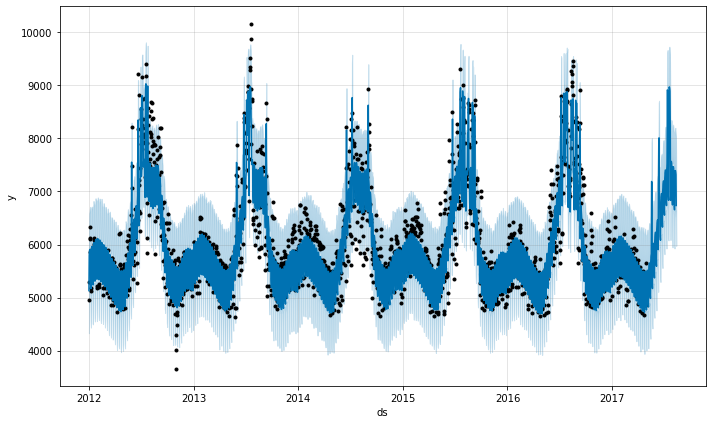

In [ ]:
fig1 = m.plot(forecast)

================================================================================

Previous model fit with Univariate demand data

![alt text](http://drive.google.com/uc?export=view&id=1ucmj_y2-5SuNjIpR89Rg6vrM0j6979wB)

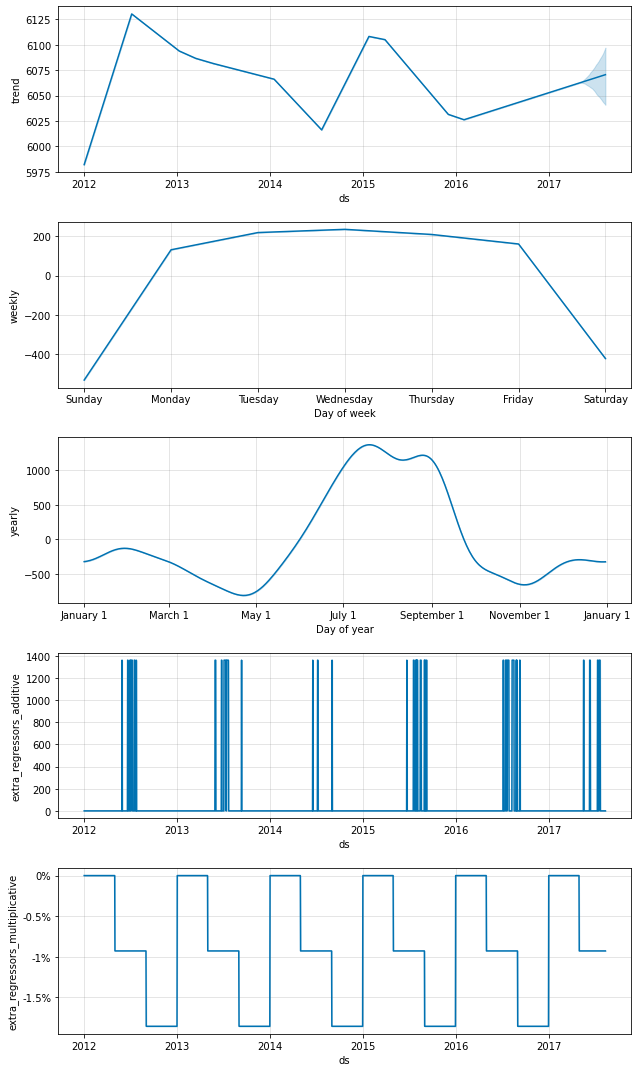

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')
cv_results

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0    2014-05-02  5538.567562  4774.476777  6252.540887  5460.325000 2014-05-01
1    2014-05-03  4958.827759  4252.961559  5708.178442  4893.683333 2014-05-01
2    2014-05-04  4844.014642  4087.762143  5599.389462  4764.137500 2014-05-01
3    2014-05-05  5542.896149  4824.033248  6299.806916  5406.762500 2014-05-01
4    2014-05-06  5622.459433  4890.535101  6349.088328  5409.750000 2014-05-01
...         ...          ...          ...          ...          ...        ...
1820 2017-04-26  5167.420698  4377.133783  5981.592521  5342.687591 2016-04-30
1821 2017-04-27  5135.573189  4331.219725  5952.864867  5445.442917 2016-04-30
1822 2017-04-28  5093.793273  4229.936186  5868.022271  5648.995917 2016-04-30
1823 2017-04-29  4516.892364  3647.917984  5376.065804  5467.143125 2016-04-30
1824 2017-04-30  4418.508367  3594.048631  5206.628426  4855.954500 2016-04-30

[1825 rows x 6 columns]

In [ ]:
df_p = performance_metrics(cv_results)
df_p

horizon            mse        rmse  ...      mape     mdape  coverage
0    36 days 12:00:00  207091.351050  455.072907  ...  0.063278  0.051366  0.884615
1    37 days 00:00:00  213175.140345  461.708935  ...  0.064444  0.053034  0.879121
2    37 days 12:00:00  214543.920550  463.188861  ...  0.064850  0.054296  0.879121
3    38 days 00:00:00  218546.723911  467.489812  ...  0.065223  0.054497  0.873626
4    38 days 12:00:00  220907.695673  470.008187  ...  0.065846  0.054716  0.873626
..                ...            ...         ...  ...       ...       ...       ...
653 363 days 00:00:00  163520.569582  404.376767  ...  0.062870  0.062709  0.978022
654 363 days 12:00:00  164383.649077  405.442535  ...  0.062873  0.062709  0.978022
655 364 days 00:00:00  167372.805641  409.112216  ...  0.063548  0.063483  0.972527
656 364 days 12:00:00  167125.921852  408.810374  ...  0.063401  0.062869  0.972527
657 365 days 00:00:00  161288.209622  401.607034  ...  0.063021  0.063483  0.978022

[658 rows x 7 columns]

Comparing to the univariate prophet analysis, MAPE values are ranging between 0.06 to 0.08 but in case of multivariate analysis it's almost close to 0.06. Means mutivariate analysis is able to capture the information more appropriately than univariate.

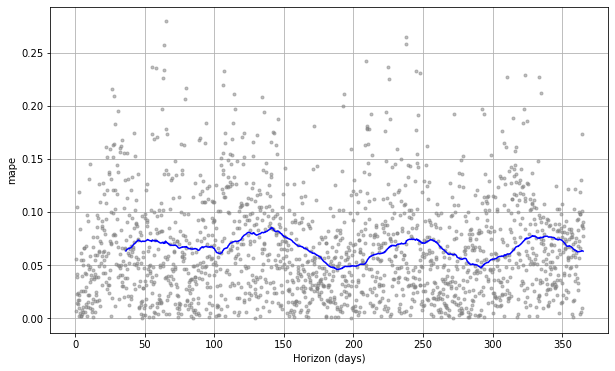

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')